In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time

In [ ]:
import pandas as pd

df = pd.read_csv('C:/Users/lokes/Downloads/final_fear_dataset_1.csv')

df = df[df['user_location'].notna()]
#df.to_csv('C:/Users/lokes/Downloads/final_fear_dataset_con1.csv', index=False)

In [ ]:
def extract_city(location):
    if ',' in location:
        city = location.split(',')[0].strip()
    else:
        city = location.strip()
    return city

df['user_location'] = df['user_location'].apply(extract_city)
#df.to_csv('C:/Users/lokes/Downloads/final_fear_dataset_con2.csv', index=False)

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError

geolocator = Nominatim(user_agent='my_app')

def is_valid_city(city):
    try:
        location = geolocator.geocode(city, addressdetails=True)
        if location:
            return True
        else:
            return False
    except (GeocoderTimedOut, GeocoderServiceError):
        return False

def get_country_name(city):
    if is_valid_city(city):
        try:
            time.sleep(1)
            location = geolocator.geocode(city, addressdetails=True)
            if location:
                country = location.raw['address'].get('country', 'Unknown')
            else:
                country = 'Unknown'
        except (GeocoderTimedOut, GeocoderServiceError):
            country = 'Unknown'
    else:
        country = 'Unknown'
    return country

df['Country_Name'] = df['user_location'].apply(get_country_name)
df.to_csv('C:/Users/lokes/OneDrive/Desktop/final_fear_country.csv', index=False)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/lokes/OneDrive/Desktop/final_fear_country.csv')

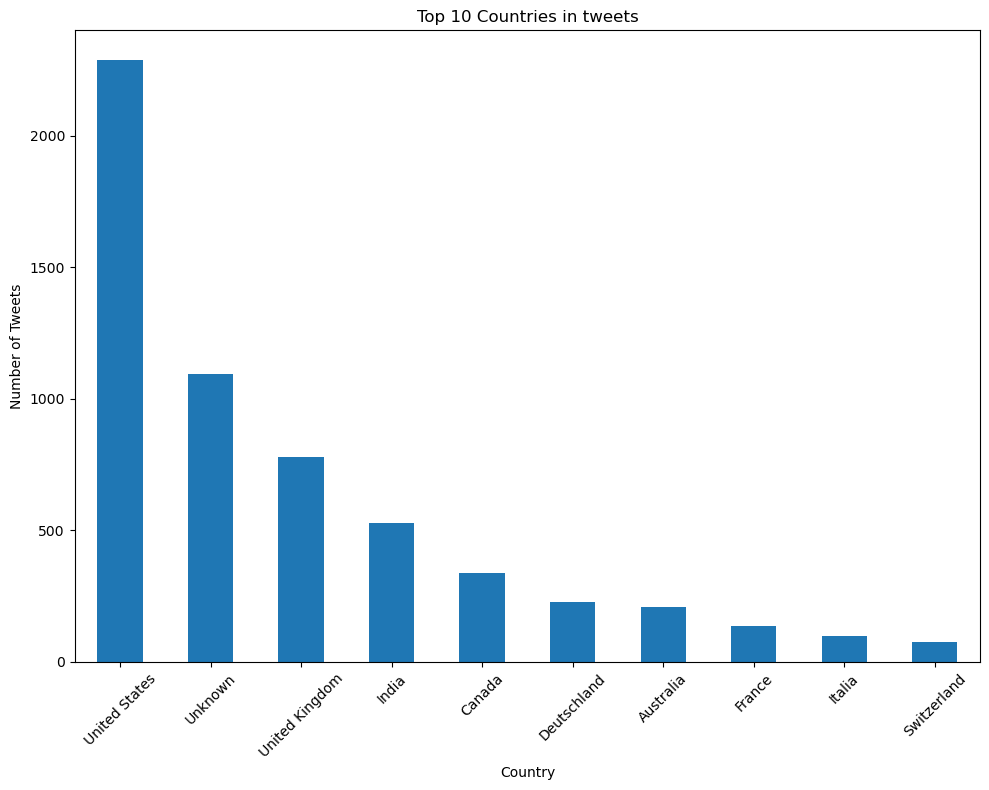

In [16]:
tweet_counts = df['Country_Name'].value_counts().head(10)
plt.figure(figsize=(10,8))
tweet_counts.plot(kind='bar')
plt.title('Top 10 Countries in tweets')
plt.xlabel('Country')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

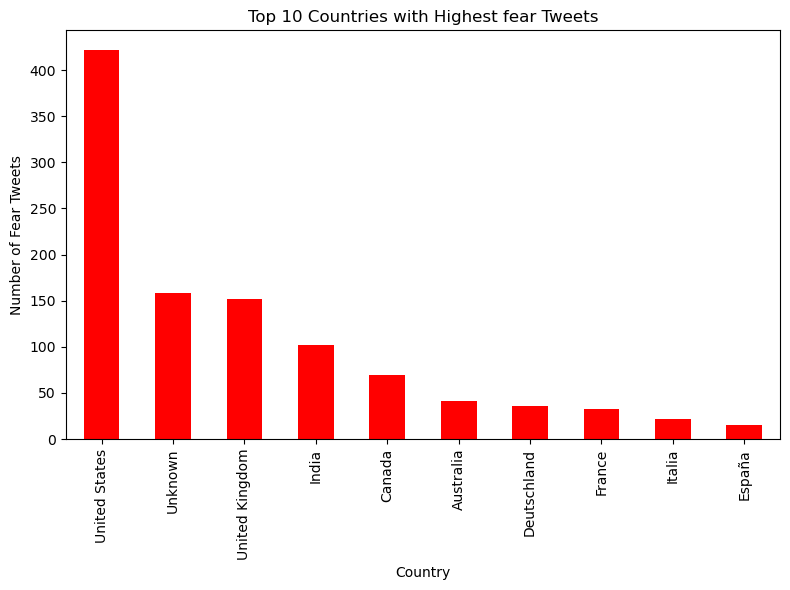

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
fear_tweets = df[df['fear?'] == 1]['Country_Name'].value_counts()
if not fear_tweets.empty: 
    plt.figure(figsize=(8,6))
    fear_tweets.head(10).plot(kind='bar', color='red')  # Plotting only the top 10
    plt.title('Top 10 Countries with Highest fear Tweets')
    plt.xlabel('Country')
    plt.ylabel('Number of Fear Tweets')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("There are no records with 'fear' marked as 1 in the dataset.")

In [12]:
fear_counts = df['fear?'].value_counts()
print(fear_counts)

fear?
0    5819
1    1259
Name: count, dtype: int64


In [13]:
unique_countries = df['Country_Name'].nunique()
print(f"The total number of unique countries in the dataset is: {unique_countries}")

The total number of unique countries in the dataset is: 137


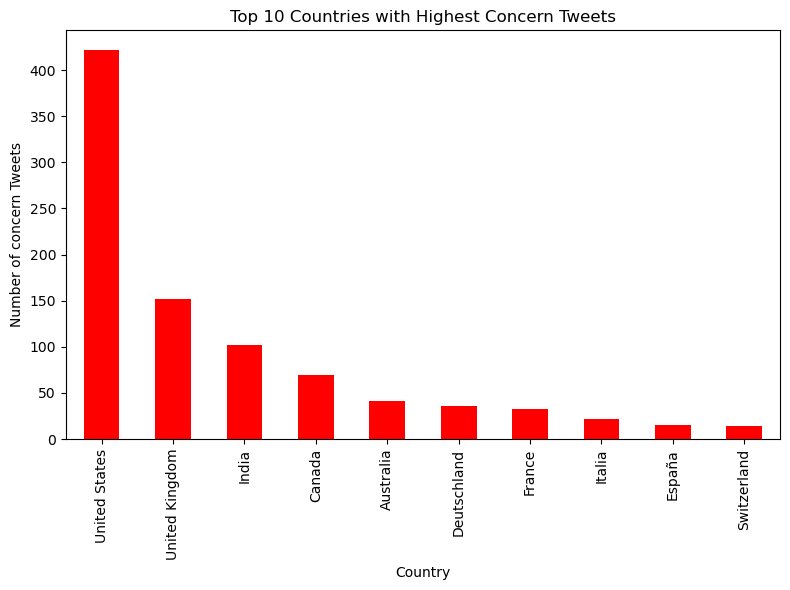

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
filtered_df = df[(df['Country_Name'] != 'Unknown') & (df['fear?'] == 1)]
fear_tweets = filtered_df['Country_Name'].value_counts()
if not fear_tweets.empty:
    plt.figure(figsize=(8,6))
    fear_tweets.head(10).plot(kind='bar', color='red')  # Plotting only the top 10
    plt.title('Top 10 Countries with Highest Concern Tweets')
    plt.xlabel('Country')
    plt.ylabel('Number of concern Tweets')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("There are no records with 'concern' marked as 1 in the dataset.")

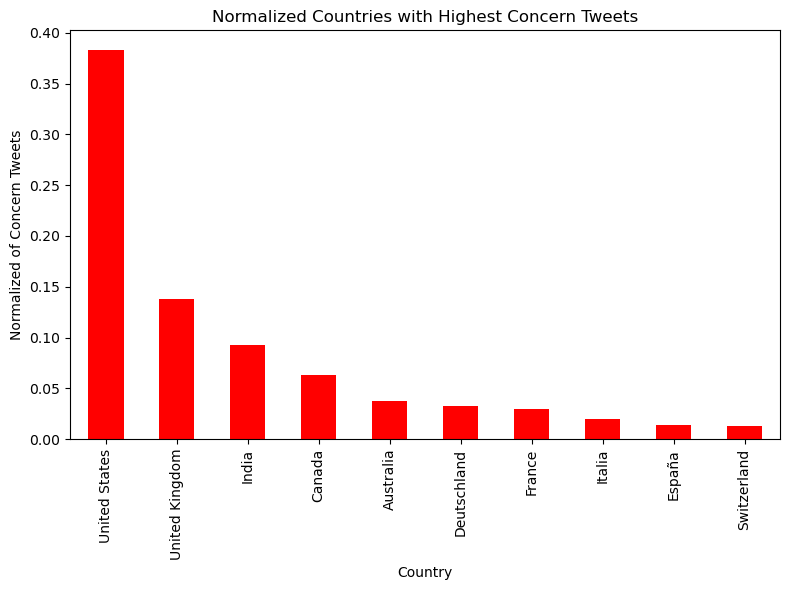

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
filtered_df = df[(df['Country_Name'] != 'Unknown') & (df['fear?'] == 1)]
fear_tweets = filtered_df['Country_Name'].value_counts(normalize=True)
if not fear_tweets.empty:
    plt.figure(figsize=(8,6))
    (fear_tweets.head(10) * 1).plot(kind='bar', color='red')
    plt.title('Normalized Countries with Highest Concern Tweets')
    plt.xlabel('Country')
    plt.ylabel('Normalized of Concern Tweets')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("There are no records with 'concern' marked as 1 in the dataset.")
